In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
from scipy.stats import normaltest
import requests
from bs4 import BeautifulSoup
from scipy.stats import pearsonr
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
from snowballstemmer import TurkishStemmer
from nltk import word_tokenize
from googletrans import Translator
import re 

In [2]:
df_comment=pd.read_csv("Trendyol_Computer_Comments.csv")
df_comment

,Original Link,Comment Link,Yorumlar
0,https://www.trendyol.com/casper/nirvana-c370-4...,https://www.trendyol.com/casper/nirvana-c370-4...,"[""daha çok yeni olduğu için performansına dair..."
1,https://www.trendyol.com/lenovo/nb-v15-82yu012...,https://www.trendyol.com/lenovo/nb-v15-82yu012...,['çok begendim ikincisini sipariş verecem tavs...
2,https://www.trendyol.com/zeiron/zgx25-ryzen-5-...,https://www.trendyol.com/zeiron/zgx25-ryzen-5-...,['Oğlum için aldım harika bir ürün tavsiye ede...
3,https://www.trendyol.com/lenovo/ideapad3-intel...,https://www.trendyol.com/lenovo/ideapad3-intel...,['sorunsuz geldi teşekkür ederim satıcıya karn...
4,https://www.trendyol.com/asus/vivobook-15-inte...,https://www.trendyol.com/asus/vivobook-15-inte...,"['Kızıma aldım çok memnun', '12 yaşındaki orta..."
...,...,...,...
5611,https://www.trendyol.com/lenovo/thinkpad-t14-g...,https://www.trendyol.com/lenovo/thinkpad-t14-g...,['Yorum Yoktur']
5612,https://www.trendyol.com/hp/victus-16-ryzen-7-...,https://www.trendyol.com/hp/victus-16-ryzen-7-...,['Yorum Yoktur']
5613,https://www.trendyol.com/hp/probook-450-g9-i5-...,https://www.trendyol.com/hp/probook-450-g9-i5-...,['Yorum Yoktur']
5614,https://www.trendyol.com/lenovo/v15-g3-intel-c...,https://www.trendyol.com/lenovo/v15-g3-intel-c...,['Yorum Yoktur']


In [8]:
df=pd.read_csv("Trendyol_Clear_Data_Computer_Price.csv")
df

,Brand,Model,Price,Rating,Link,Favori Number,Rush Delivery,Free Cargo,İşlemci Tipi,Ram (Sistem Belleği),...,Garanti Tipi,Temel İşlemci Hızı (GHz),Maksimum İşlemci Hızı (GHz),Bağlantılar,Klavye,Ekran Kartı Bellek Tipi,Çözünürlük Standartı,Garanti Süresi,Arttırılabilir Azami Bellek,HDMI
0,CASPER,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,8750.00,4.2,https://www.trendyol.com/casper/nirvana-c370-4...,60500.0,0,1,Intel Celeron,4.0,...,Casper Türkiye Garantili,1.1,2.8,Bluetooth,Q Türkçe,Dahili,HD Ready (HD),1.0,8.0,Yok
1,LENOVO,NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...,13499.00,4.5,https://www.trendyol.com/lenovo/nb-v15-82yu012...,18500.0,1,1,AMD Ryzen 5,16.0,...,Lenovo Türkiye Garantili,1.1,2.8,Wi-Fi,F Klavye,Dahili,Full HD (FHD),2.0,32.0,Yok
2,Zeiron,Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...,18299.00,4.6,https://www.trendyol.com/zeiron/zgx25-ryzen-5-...,30300.0,1,1,AMD Ryzen 5,32.0,...,Zeiron Türkiye Garantili,3.6,4.4,HDMI,RGB,DDR4,Full HD (FHD),2.0,64.0,Var
3,LENOVO,IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....,11005.00,3.8,https://www.trendyol.com/lenovo/ideapad3-intel...,4354.0,1,1,Intel Core i3,8.0,...,Lenovo Türkiye Garantili,4.0,4.0,USB - Bluetooth - HDMI,Q Türkçe,Dahili,Full HD (FHD),2.0,16.0,Yok
4,ASUS,Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...,15498.00,4.5,https://www.trendyol.com/asus/vivobook-15-inte...,7974.0,1,1,Intel Core i5,8.0,...,Asus Türkiye Garantili,1.3,4.4,USB - Bluetooth - HDMI,Q Türkçe,DDR5,Full HD (FHD),2.0,8.0,Yok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,LENOVO,"Ryzen 7 Pro 5850u 48gb 2tb Ssd 14"" W11p 20xls3...",43399.00,0.0,https://www.trendyol.com/lenovo/thinkpad-t14-g...,0.0,1,1,AMD Ryzen 7,48.0,...,Resmi Distribütör Garantili,1.9,4.4,Bluetooth - USB,Q Türkçe,Dahili,Full HD (FHD),3.0,64.0,Yok
5612,HP,"24GB 4TB SSD RTX4070/8GB 144HZ 16.1"" FHD FDOS ...",75716.13,0.0,https://www.trendyol.com/hp/victus-16-ryzen-7-...,0.0,0,1,AMD Ryzen 7,24.0,...,HP Türkiye Garantili,1.9,5.0,USB - Bluetooth - HDMI,RGB,GDDR6,Full HD (FHD),2.0,64.0,Yok
5613,HP,"64GB 256GB SSD 15.6"" FHD W11PRO 6S6Z1EA & PER4...",39655.09,0.0,https://www.trendyol.com/hp/probook-450-g9-i5-...,0.0,0,1,Intel Core i5,64.0,...,HP Türkiye Garantili,1.7,4.4,USB - Bluetooth - HDMI,Q Türkçe,Dahili,Full HD (FHD),2.0,64.0,Yok
5614,LENOVO,V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...,24464.30,5.0,https://www.trendyol.com/lenovo/v15-g3-intel-c...,0.0,0,1,Intel Core i7,24.0,...,Lenovo Türkiye Garantili,3.5,4.2,Bluetooth - HDMI,Q Türkçe,Dahili,Full HD (FHD),2.0,128.0,Yok


In [9]:
df=df.drop_duplicates(subset='Link')

In [4]:
df_new=df_comment.drop_duplicates(subset='Comment Link')

In [5]:
df_new["Comments"] = df_new["Yorumlar"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\29860784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Comments"] = df_new["Yorumlar"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [107]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

In [90]:
def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)  # Temel noktalama temizliği
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)  # Fazla boşlukları temizle
    text = re.sub('\n\n', '', text)  # Gereksiz yeni satırları temizle
    text = text.rstrip().strip()

    
    words = text.split()
    cleaned_words = [word for word in words if word not in stoplist]

    return " ".join(cleaned_words)

In [7]:
def cleand_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)  # Temel noktalama temizliği
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)  # Fazla boşlukları temizle
    text = re.sub('\n\n', '', text)  # Gereksiz yeni satırları temizle
    text = text.rstrip().strip()
    return text

In [10]:
df_new["Brand"]=df["Brand"]
df_new["Model"]=df["Model"]
df_new["Rating"]=df["Rating"]
df_new["Favori Number"]=df["Favori Number"]
df_new["Price"]=df["Price"]

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Brand"]=df["Brand"]
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Model"]=df["Model"]
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [14]:
df_new = df_new.reset_index(drop=True)

In [110]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

# Çevirici ve analizör başlat
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # Metni İngilizce'ye çevir
    translated_text = translator.translate(text, src="tr", dest="en").text
    
    # Sentiment analizi yap
    score = analyzer.polarity_scores(translated_text)
    
    # Compound değerine göre sınıflandır
    if score['compound'] >= 0.05:
        sentiment = "Pozitif"
    elif score['compound'] <= -0.05:
        sentiment = "Negatif"
    else:
        sentiment = "Nötr"
    
    return sentiment, score

# Test metni
text = "Leptop çok kötü"
sentiment, score = get_sentiment(text)

print(f"Metin: {text}")
print(f"Çevrilen Metin: {translator.translate(text, src='tr', dest='en').text}")
print(f"Polarity Skorları: {score}")
print(f"Sonuç: {sentiment}")

Metin: Leptop çok kötü
Çevrilen Metin: Laptop is so bad
Polarity Skorları: {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}
Sonuç: Negatif


In [13]:
result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][100]]
tek_metin = " ".join(cleaned_texts)
sentiment, score = get_sentiment(tek_metin)
print(f"Metin: {tek_metin}")
print(f"Çevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
print(f"Polarity Skorları: {score}")
print(f"Sonuç: {sentiment}")
result["Text"].append(tek_metin)
result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
for key,value in score.items():
    if key=="neg":
        result["Negatif"].append(value)
    elif key=="neu":
        result["Notr"].append(value)
    elif key=="pos":
        result["Positif"].append(value)
    else:
        result["Compound"].append(value)
result["Sentiment"].append(sentiment)

res=pd.DataFrame(result)
res


Metin: bir aydır kullanıyor oğlum gayet memnun teşekkürler eşimi doğum günü hediyesi aldım çok güzel tek kelime ile mükemmel hiçbir sorunu yok gayet korunaklı geldi gayet sağlam ve güvenilir teşekkür ederiz alalı bir ay oldu ben çok memnunum hızı mükemmel çok güzel paketleme ve kargonun hızı inanılmaz çok mükemmel kalite performans çok iyi güzel bilgisayarcıya kurdurdum çocuğum için aldım oldukça memnun sorun çıkmadı casperı tebrik ederim bu laptop olmuş on numara beş yıldız monsterdan daha iyi alıcak arkadaşlar kaçırmayın yeni yıl zammından önce kapmaya bakın 32 ram daha ekleyin laptobunuzu doya doya 45 sene kullanın 🤩 fiyat performans ürünü tavsiye ederim harika bilgisayar kesinlikle alabilirsiniz çok güzel bir ürün fiyat performans ütünü tavsiye ederim ürün çok kötü bilgisayar baya iyi her kese tavsiye ederim volorantta 320 üzeri fps aldım düsük ayarlarda harika bir bilgisayar cok beğendik başarılı bir ürün çok iyi bir bilgisayar sorunsuz tam kapasite kaliteli ürün çok memnun kaldım

,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,bir aydır kullanıyor oğlum gayet memnun teşekk...,"He has been using it for a month, my son is ve...",0.049,0.625,0.326,0.9974,Pozitif


In [ ]:
data={"Brand":[],"Model":[],"Price":[],"Favori Number":[],"Rating":[],"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}

for i in range(len(df_new["Comments"][:100])):
    data["Brand"].append(df_new["Brand"][i])
    data["Model"].append(df_new["Model"][i])
    data["Price"].append(df_new["Price"][i])
    data["Favori Number"].append(df_new["Favori Number"][i])
    data["Rating"].append(df_new["Rating"][i])
    
    cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][i]]
    tek_metin = " ".join(cleaned_texts)
    sentiment, score = get_sentiment(tek_metin)
        
        
    translated_text = translator.translate(tek_metin, src='tr', dest='en').text

        
    data["Text"].append(tek_metin)
    data["Translated Text"].append(translated_text)
    data["Negatif"].append(score["neg"])
    data["Notr"].append(score["neu"])
    data["Positif"].append(score["pos"])
    data["Compound"].append(score["compound"])
    data["Sentiment"].append(sentiment)

df_main=pd.DataFrame(data)
df_main 

In [ ]:
data = {
    "Brand": [],
    "Model": [],
    "Price": [],
    "Favori Number": [],
    "Rating": [],
    "Text": [],
    "Translated Text": [],
    "Negatif": [],
    "Notr": [],
    "Positif": [],
    "Compound": [],
    "Sentiment": []
}


for i in range(1000,2794):
    try:
        # Temel bilgileri ekleyelim
        data["Brand"].append(df_new["Brand"][i])
        data["Model"].append(df_new["Model"][i])
        data["Price"].append(df_new["Price"][i])
        data["Favori Number"].append(df_new["Favori Number"][i])
        data["Rating"].append(df_new["Rating"][i])

        # 1️ **Metni temizle**
        try:
            cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][i]]
            tek_metin = " ".join(cleaned_texts)
        except Exception as e:
            print(f"Temizleme hatası, indeks: {i}, Hata: {e}")
            tek_metin = np.nan  # Hata olursa NaN ekle

        data["Text"].append(tek_metin)

        #  **Duygu Analizi Yap**
        if isinstance(tek_metin, str) and tek_metin.strip():
            try:
                sentiment, score = get_sentiment(tek_metin)
                data["Negatif"].append(score["neg"])
                data["Notr"].append(score["neu"])
                data["Positif"].append(score["pos"])
                data["Compound"].append(score["compound"])
                data["Sentiment"].append(sentiment)
            except Exception as e:
                print(f"Duygu analizi hatası, indeks: {i}, Hata: {e}")
                data["Negatif"].append(np.nan)
                data["Notr"].append(np.nan)
                data["Positif"].append(np.nan)
                data["Compound"].append(np.nan)
                data["Sentiment"].append(np.nan)
        else:
            data["Negatif"].append(np.nan)
            data["Notr"].append(np.nan)
            data["Positif"].append(np.nan)
            data["Compound"].append(np.nan)
            data["Sentiment"].append(np.nan)

        #  **Çeviri Yap**
        if isinstance(tek_metin, str) and tek_metin.strip():
            try:
                translated_text = translator.translate(tek_metin, src='tr', dest='en').text
            except Exception as e:
                print(f"Çeviri hatası, indeks: {i}, Hata: {e}")
                translated_text = np.nan  
        else:
            translated_text = np.nan

        data["Translated Text"].append(translated_text)

    except Exception as e:
        print(f"Genel hata, indeks: {i}, Hata: {e}")


df_mainx = pd.DataFrame(data)


df_mainx


In [ ]:
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Translated Text"].isna()),"Translated Text"]="NO COMMENT"
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Negatif"].isna()),"Negatif"]=0.688
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Notr"].isna()),"Notr"]=0.312
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Positif"].isna()),"Positif"]=0.0
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Compound"].isna()),"Compound"]=-0.296
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Sentiment"].isna()),"Sentiment"]="Negatif"


In [ ]:
for ix in number:
    ix=ix+1000
    result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
    cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][ix]]
    tek_metin = " ".join(cleaned_texts)
    sentiment, score = get_sentiment(tek_metin)
    print(f"Metin: {tek_metin}")
    print(f"Çevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
    print(f"Polarity Skorları: {score}")
    print(f"Sonuç: {sentiment}")
    result["Text"].append(tek_metin)
    result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
    for key,value in score.items():
        if key=="neg":
            result["Negatif"].append(value)
        elif key=="neu":
            result["Notr"].append(value)
        elif key=="pos":
            result["Positif"].append(value)
        else:
            result["Compound"].append(value)
    result["Sentiment"].append(sentiment)

    res=pd.DataFrame(result)
    ix-=1000
    for col in ["Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]:
        df_mainx[col][ix]=res[col][0]

In [ ]:
df_tr= pd.concat([df_main, df_mainx])
df_tr

Clear Data 

In [15]:
df=pd.read_csv("Trendyol_Computer_Comments_NlpClearData.csv")
df

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,CASPER,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,8750.00,60500.0,4.2,daha çok yeni olduğu için performansına dair y...,I can not comment on the performance of more n...,0.014,0.691,0.295,0.9988,Pozitif
1,LENOVO,NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...,13499.00,18500.0,4.5,çok begendim ikincisini sipariş verecem tavsiy...,I would like to order the latter.I have resear...,0.003,0.740,0.257,0.9993,Pozitif
2,Zeiron,Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...,18299.00,30300.0,4.6,oğlum için aldım harika bir ürün tavsiye ederi...,I bought a great product for my son I recommen...,0.010,0.686,0.304,0.9996,Pozitif
3,LENOVO,IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....,11005.00,4354.0,3.8,sorunsuz geldi teşekkür ederim satıcıya karne ...,Thank you. I bought it as a report card gift t...,0.047,0.733,0.220,0.9959,Pozitif
4,ASUS,Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...,15498.00,7974.0,4.5,kızıma aldım çok memnun 12 yaşındaki ortaokula...,I bought my daughter very satisfied 12 -year -...,0.045,0.651,0.304,0.9992,Pozitif
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,LENOVO,"Ryzen 7 Pro 5850u 48gb 2tb Ssd 14"" W11p 20xls3...",43399.00,0.0,0.0,yorum yoktur,NO COMMENT,0.688,0.312,0.000,-0.2960,Negatif
2789,HP,"24GB 4TB SSD RTX4070/8GB 144HZ 16.1"" FHD FDOS ...",75716.13,0.0,0.0,yorum yoktur,NO COMMENT,0.688,0.312,0.000,-0.2960,Negatif
2790,HP,"64GB 256GB SSD 15.6"" FHD W11PRO 6S6Z1EA & PER4...",39655.09,0.0,0.0,yorum yoktur,NO COMMENT,0.688,0.312,0.000,-0.2960,Negatif
2791,LENOVO,V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...,24464.30,0.0,5.0,yorum yoktur,NO COMMENT,0.688,0.312,0.000,-0.2960,Negatif


In [122]:
df.isnull().sum()

Brand              0
Model              0
Price              0
Favori Number      0
Rating             0
Text               0
Translated Text    0
Negatif            0
Notr               0
Positif            0
Compound           0
Sentiment          0
dtype: int64

In [120]:
for ix in indx:
    for col in ["Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]:
        df.loc[ix,col]=res.loc[0,col]
    



In [119]:
indx=df.loc[(df["Translated Text"]=="NO COMMENT")&(df["Negatif"].isna())].index
indx

Index([870, 890, 907], dtype='int64')

In [121]:
df.loc[(df["Translated Text"]=="NO COMMENT")&(df["Negatif"].isna())]

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment


In [117]:
df["Sentiment"].value_counts()

Sentiment
Negatif    1914
Pozitif     828
Nötr         48
Name: count, dtype: int64

In [113]:
result={"İndex":[],"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
for ix in indx:
    result["İndex"].append(ix)
    cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][ix]]
    tek_metin = " ".join(cleaned_texts)

    sentiment, score = get_sentiment(tek_metin)
    print(f"Metin: {tek_metin}")
    print(f"Çevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
    print(f"Polarity Skorları: {score}") 
    print(f"Sonuç: {sentiment}")
    result["Text"].append(tek_metin)
    result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
    result["Negatif"].append(score["neg"])
    result["Notr"].append(score["neu"])
    result["Positif"].append(score["pos"])
    result["Compound"].append(score["compound"])
    result["Sentiment"].append(sentiment)
            
res=pd.DataFrame(result).set_index("İndex")
res

Metin: özenli bir şekilde paketlenmiş sorunsuz elime ulaştı paketi açılmamıştı sıfır ürün teşekkürler
Çevrilen Metin: I reached my hand without any careful package, the package was not opened zero product thanks
Polarity Skorları: {'neg': 0.069, 'neu': 0.573, 'pos': 0.358, 'compound': 0.7232}
Sonuç: Pozitif
Metin: satıcıdan indirimli fiyata bilgisayar aldık üçlü priz geldi tedarik edemiyoruz bahanesiyle ürünü göndermediler iletişim kulabiliyor ama ürüne ulaşamadık
Çevrilen Metin: We bought a computer at a discount price from the seller, the triple socket came, they did not send the product under the pretext that we could not supply, but we could not reach the product
Polarity Skorları: {'neg': 0.031, 'neu': 0.969, 'pos': 0.0, 'compound': -0.0286}
Sonuç: Nötr
Metin: gayet güzel geldi
Çevrilen Metin: It sounded fine
Polarity Skorları: {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}
Sonuç: Pozitif
Metin: fiyat performans olarak çok iyi beğendim rengi aşırı tatlı kargolama gay

,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
İndex,,,,,,,
902,özenli bir şekilde paketlenmiş sorunsuz elime ...,"I reached my hand without any careful package,...",0.069,0.573,0.358,0.7232,Pozitif
1145,satıcıdan indirimli fiyata bilgisayar aldık üç...,We bought a computer at a discount price from ...,0.031,0.969,0.000,-0.0286,Nötr
1157,gayet güzel geldi,It sounded fine,0.000,0.526,0.474,0.2023,Pozitif
1162,fiyat performans olarak çok iyi beğendim rengi...,I like the price very well in terms of perform...,0.000,0.594,0.406,0.8012,Pozitif
1171,orta sınıfa yakınhp kalitesi urun çok hızlı ta...,Near the middle class I recommend the product ...,0.053,0.692,0.255,0.9294,Pozitif
1188,mükemmel bir bilgisayar apple almak istiyordum...,"I wanted to buy an excellent computer apple, b...",0.072,0.640,0.288,0.8573,Pozitif
1211,çok güzel ve kaliteli bir ürün tavsiye ederim ...,I recommend a very nice and high quality produ...,0.153,0.812,0.034,-0.9349,Negatif
1241,kurulum aşaması biraz sıkıntılı oldu ama sonra...,"The installation phase was a bit troublesome, ...",0.105,0.718,0.177,0.6858,Pozitif
1335,işlemci ve rami çok dandik donuyor,Processor and Rami freezes,0.268,0.732,0.000,-0.0258,Nötr


In [118]:

result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][870]]
tek_metin = " ".join(cleaned_texts)

sentiment, score = get_sentiment(tek_metin)
print(f"Metin: {tek_metin}")
print(f"Çevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
print(f"Polarity Skorları: {score}")
print(f"Sonuç: {sentiment}")
result["Text"].append(tek_metin)
result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
for key,value in score.items():
    if key=="neg":
        result["Negatif"].append(value)
    elif key=="neu":
        result["Notr"].append(value)
    elif key=="pos":
        result["Positif"].append(value)
    else:
        result["Compound"].append(value)
result["Sentiment"].append(sentiment)

res=pd.DataFrame(result)
res


Metin: yorum yoktur
Çevrilen Metin: NO COMMENT
Polarity Skorları: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
Sonuç: Negatif


,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,yorum yoktur,NO COMMENT,0.688,0.312,0.0,-0.296,Negatif


Clear Data

In [131]:
dfx=df.copy()

In [133]:
df[df["Translated Text"]=="NO COMMENT"]

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
26,LENOVO,Ryzen 5-5625U 16GB 512GB SSD 15.6 FHD FreeDos ...,12999.00,113.0,5.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
29,Dell,Inspiron 3520 Intel Core i5 1235U 16 gb 512 GB...,16599.00,2271.0,4.6,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
30,LENOVO,Ideapad 1 Intel Celeron N4020 8GB 256GB SSD DO...,9999.00,6796.0,4.5,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
31,Creature,CRTG102 Ryzen 5 5600 16GB DDR4 512GB NVMe RTX ...,26321.17,800.0,5.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
33,LENOVO,Ideapad 1 AMD Ryzen 7 5700U 16GB 512GB SSD Fre...,16598.00,1783.0,4.4,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,LENOVO,"Ryzen 7 Pro 5850u 48gb 2tb Ssd 14"" W11p 20xls3...",43399.00,0.0,0.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
2789,HP,"24GB 4TB SSD RTX4070/8GB 144HZ 16.1"" FHD FDOS ...",75716.13,0.0,0.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
2790,HP,"64GB 256GB SSD 15.6"" FHD W11PRO 6S6Z1EA & PER4...",39655.09,0.0,0.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr
2791,LENOVO,V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...,24464.30,0.0,5.0,yorum yoktur,NO COMMENT,0.0,1.0,0.0,0.0,Nötr


In [132]:
df.loc[(df["Translated Text"]=="NO COMMENT"),"Sentiment"]="Nötr"
df.loc[(df["Translated Text"]=="NO COMMENT"),"Compound"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Positif"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Negatif"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Notr"]=1.0

In [134]:
df["Sentiment"].value_counts()

Sentiment
Nötr       1902
Pozitif     828
Negatif      63
Name: count, dtype: int64

In [145]:
data=df[df["Translated Text"]!="NO COMMENT"]
data

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,CASPER,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,8750.00,60500.0,4.2,daha çok yeni olduğu için performansına dair y...,I can not comment on the performance of more n...,0.014,0.691,0.295,0.9988,Pozitif
1,LENOVO,NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...,13499.00,18500.0,4.5,çok begendim ikincisini sipariş verecem tavsiy...,I would like to order the latter.I have resear...,0.003,0.740,0.257,0.9993,Pozitif
2,Zeiron,Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...,18299.00,30300.0,4.6,oğlum için aldım harika bir ürün tavsiye ederi...,I bought a great product for my son I recommen...,0.010,0.686,0.304,0.9996,Pozitif
3,LENOVO,IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....,11005.00,4354.0,3.8,sorunsuz geldi teşekkür ederim satıcıya karne ...,Thank you. I bought it as a report card gift t...,0.047,0.733,0.220,0.9959,Pozitif
4,ASUS,Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...,15498.00,7974.0,4.5,kızıma aldım çok memnun 12 yaşındaki ortaokula...,I bought my daughter very satisfied 12 -year -...,0.045,0.651,0.304,0.9992,Pozitif
...,...,...,...,...,...,...,...,...,...,...,...,...
2580,LENOVO,V15 G3 82tv009ctx Ryzen 7 5825u 16gb 512gb Ssd...,18629.00,105.0,4.8,kızım için aldim cok memnun kaldı i̇lkinden me...,"I was very pleased for my daughter, we were sa...",0.000,0.795,0.205,0.8048,Pozitif
2585,ASUS,Vivobook 15 Intel Core i5 1235U 16GB 512GB SSD...,19969.00,0.0,5.0,gerçekten harika bir bilgisayar satıcı bütün s...,A really great computer seller answered all my...,0.000,0.561,0.439,0.8797,Pozitif
2589,HP,HP Victus 15,42999.99,656.0,5.0,çok güzel bir ürün çok memnun kaldım tereddüt ...,"I was very pleased with a very nice product, b...",0.000,0.798,0.202,0.9820,Pozitif
2590,Apple,13-inch MacBook Air: Apple M3 chip with 8-core...,60049.00,0.0,5.0,eşime ögretmenler günü hediyesi olarak aldım ç...,"I bought it as a gift to my wife, I liked it v...",0.000,0.668,0.332,0.9371,Pozitif


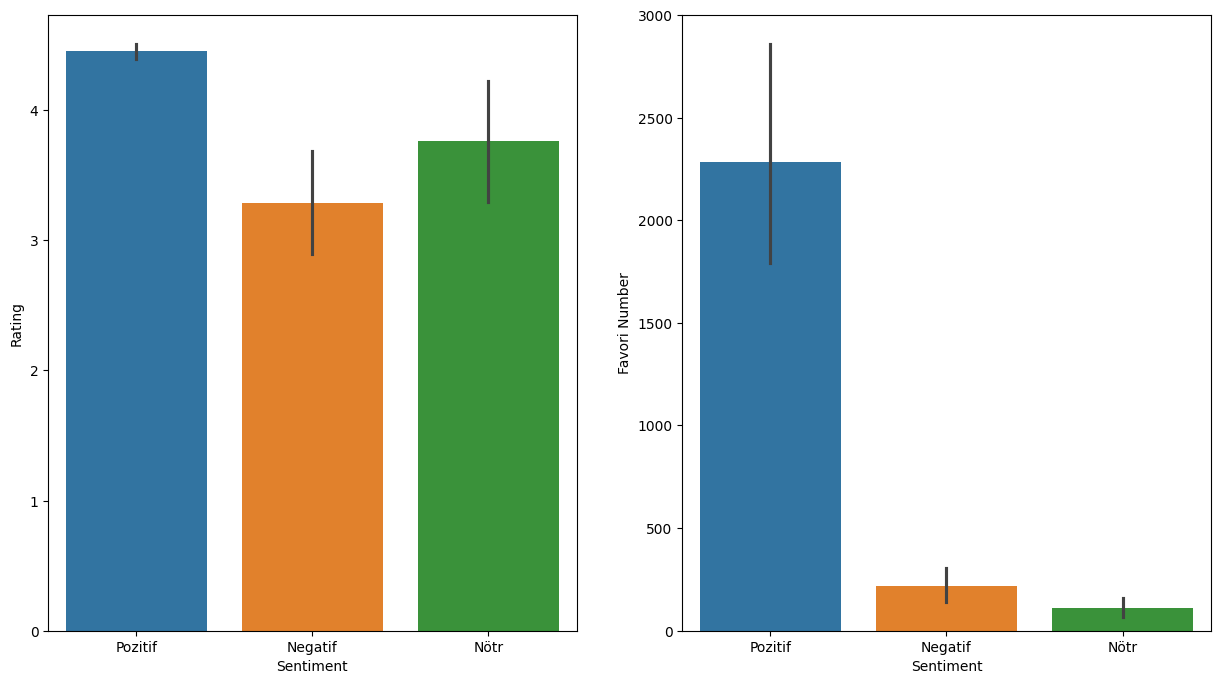

In [144]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x="Sentiment",y="Rating",hue="Sentiment",data=data,ax=ax[0])
sns.barplot(x="Sentiment",y="Favori Number",hue="Sentiment",data=data,ax=ax[1])
plt.show()


In [169]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score,f1_score,balanced_accuracy_score,roc_auc_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

In [235]:
dx=data[["Brand","Rating","Text","Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]]
le=LabelEncoder()
for col in dx.select_dtypes(object).columns:
    dx[col]=le.fit_transform(dx[col])
    

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx[col]=le.fit_transform(dx[col])
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx[col]=le.fit_transform(dx[col])
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [159]:
x=dx.drop("Sentiment",axis=1)
y=dx["Sentiment"]
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [163]:
result={"Model":[],"F1":[],"MSE":[],"Acc":[]}
models = [
    ('LG', LogisticRegression()),
    ("SDG",SGDClassifier()),
    ("PA",PassiveAggressiveClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('HistgBM',HistGradientBoostingClassifier()),
    ('GBM',GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB',XGBRFClassifier()),
    ('XGBRF',XGBRFClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1))
]
for name,model in models:
    model.fit(x_tr,y_tr)
    y_pr=model.predict(x_ts)
    f1=f1_score(y_ts, y_pr,average='weighted')
    acc=balanced_accuracy_score(y_ts,y_pr)
    mse=mean_squared_error(y_ts,y_pr)
    result["Model"].append(name)
    result["F1"].append(f1)
    result["MSE"].append(mse)
    result["Acc"].append(acc)

Model_score=pd.DataFrame(result)
Model_score.sort_values(by="Acc",ascending=False)
        


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,F1,MSE,Acc
4,CART,1.000000,0.000000,1.000000
5,HistgBM,1.000000,0.000000,1.000000
6,GBM,1.000000,0.000000,1.000000
7,RF,1.000000,0.000000,1.000000
8,XGB,1.000000,0.000000,1.000000
9,XGBRF,1.000000,0.000000,1.000000
10,LightGBM,0.991560,0.008511,0.958333
0,LG,0.929090,0.080851,0.619610
1,SDG,0.831161,0.319149,0.333333
3,KNN,0.828781,0.340426,0.330128


In [167]:
np.unique(y_ts)

array([0, 1, 2])

In [315]:
def classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,df,target):
    x=df.drop(target,axis=1)
    y=df[target]
    x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)
    result={"Model":[],"F1":[],"MSE":[],"Acc":[],"Auc":[]}
    models = [
    ('LG', LogisticRegression()),
    ("SDG",SGDClassifier()),
    ("PA",PassiveAggressiveClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('HistgBM',HistGradientBoostingClassifier()),
    ('GBM',GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB',XGBRFClassifier()),
    ('XGBRF',XGBRFClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1))
]
    classes=np.unique(y_ts)
    y_ts_bin = label_binarize(y_ts, classes=classes)
    for name,model in models:
        model.fit(x_tr,y_tr)
        y_pr=model.predict(x_ts)
        f1=f1_score(y_ts, y_pr,average='weighted')
        acc=balanced_accuracy_score(y_ts,y_pr)
        mse=mean_squared_error(y_ts,y_pr)
        result["Model"].append(name)
        result["F1"].append(f1)
        result["MSE"].append(mse)
        result["Acc"].append(acc)
        y_pr_bin = label_binarize(y_pr, classes=classes)
        auc_score = roc_auc_score(y_ts_bin, y_pr_bin, average='macro', multi_class='ovr')
        result["Auc"].append(auc_score)
        
        
        plt.figure(figsize=(15, 6))

        cm = confusion_matrix(y_ts, y_pr)
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')

        
        plt.subplot(1, 2, 2)
        for i in range(y_ts_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_ts_bin[:, i], y_pr_bin[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc="lower right")
        
        plt.show()
            
    
    
    
    Model_score=pd.DataFrame(result)
    Model_score=Model_score.sort_values(by="Acc",ascending=False)
    
    
    feature_importance = Model_score["Model"][0].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    sorted_importance = feature_importance[sorted_idx]
    sorted_feature_names = x.columns[sorted_idx]

    plt.figure(figsize=(15,8))
    
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xticks(range(len(feature_importance)), x_tr.columns, rotation=90)
    plt.title("Feature Importance Plot")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
    
    res = pd.DataFrame({"Column": sorted_feature_names, "Importance": sorted_importance})
    top_features = res.sort_values(by="Importance", ascending=False).head()
    
    return Model_score,top_features
    

c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


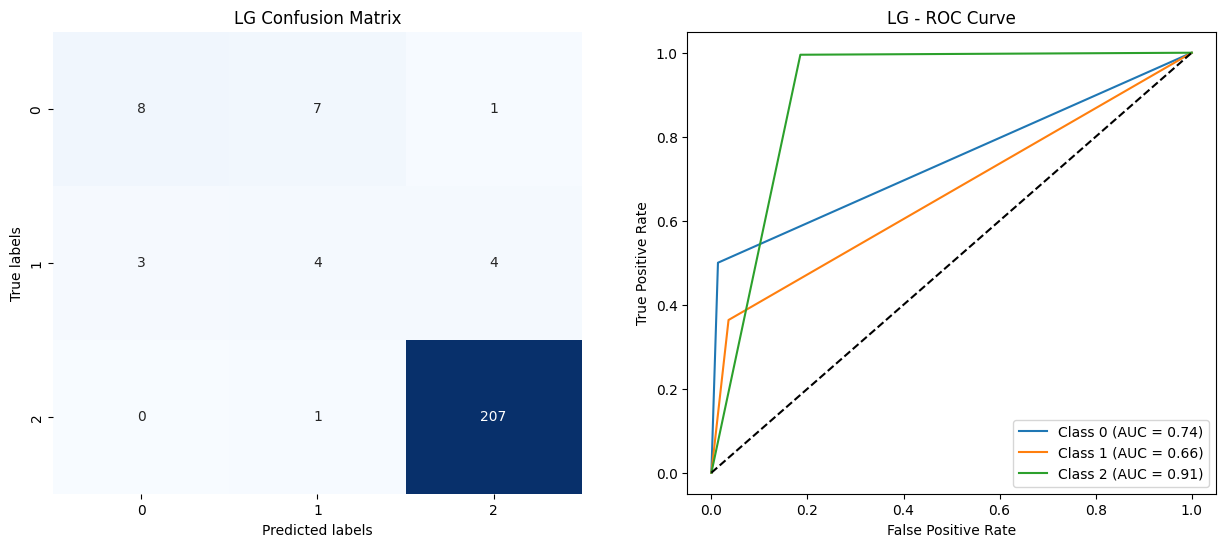

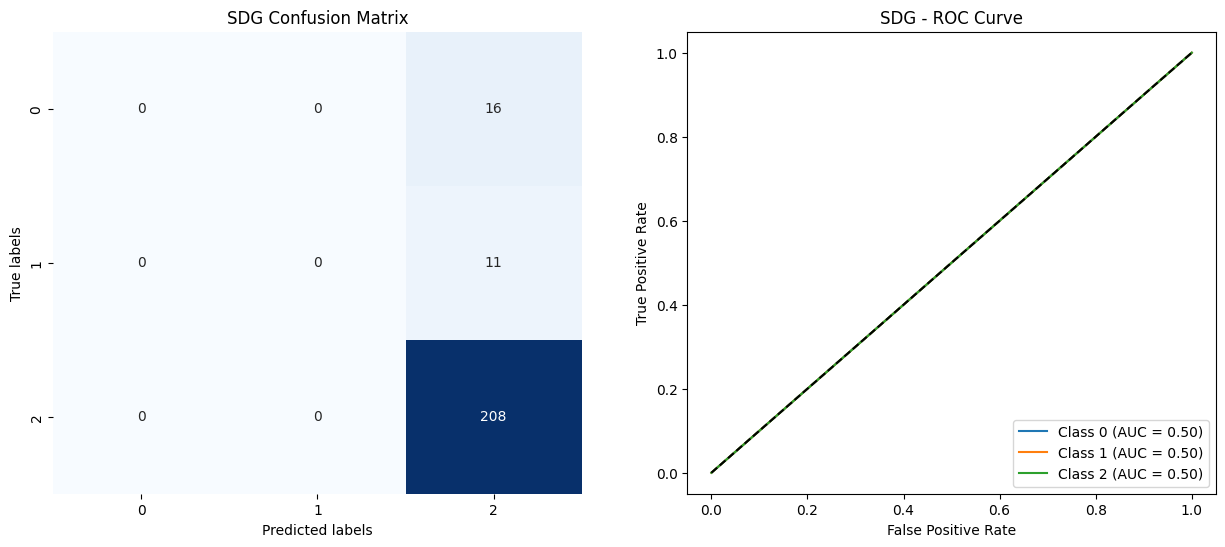

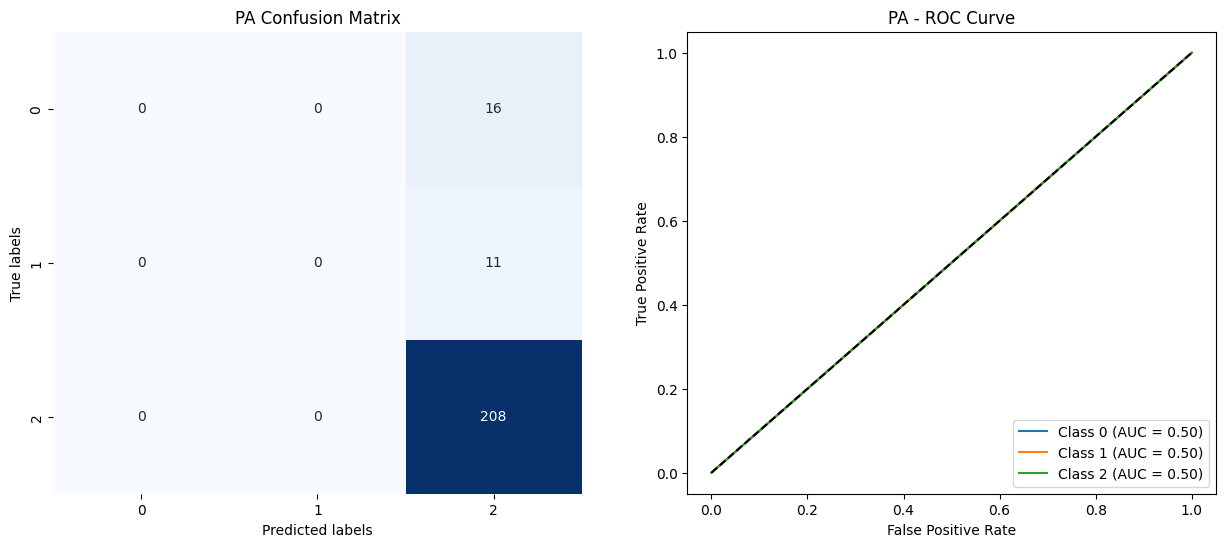

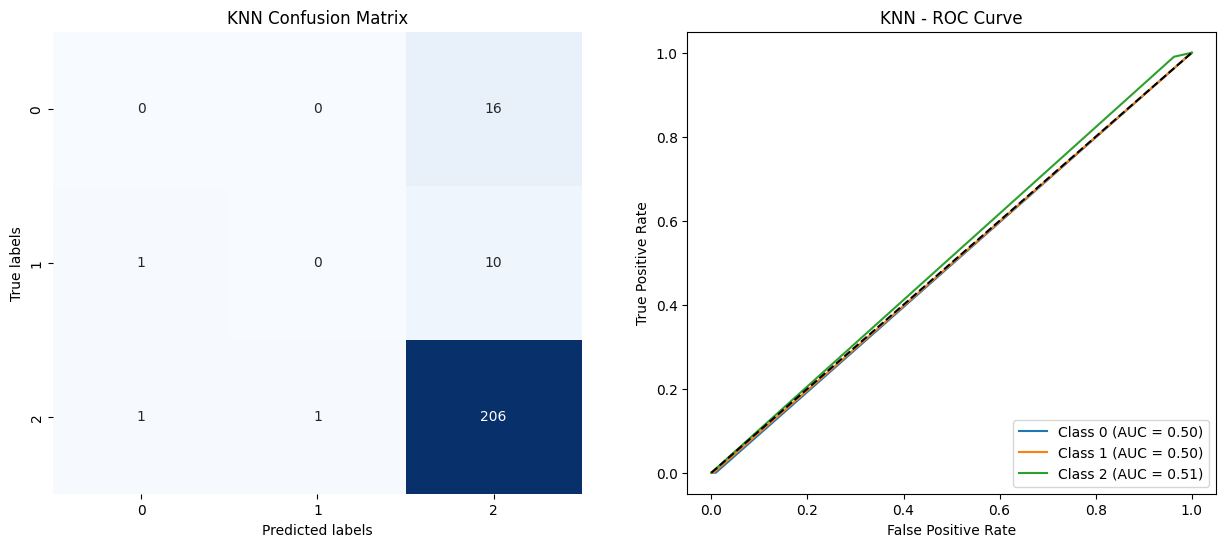

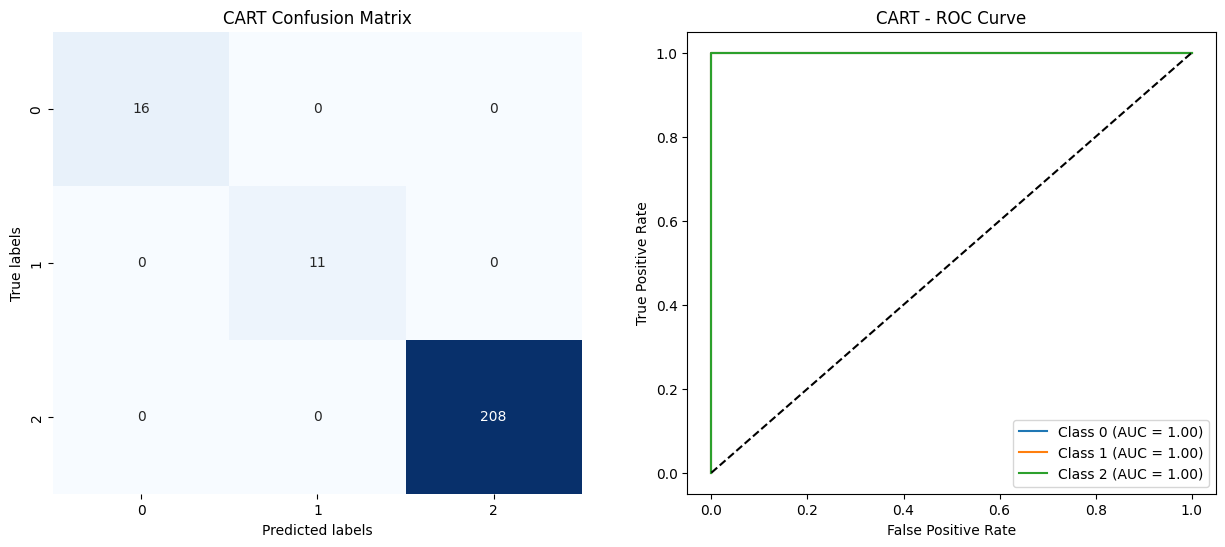

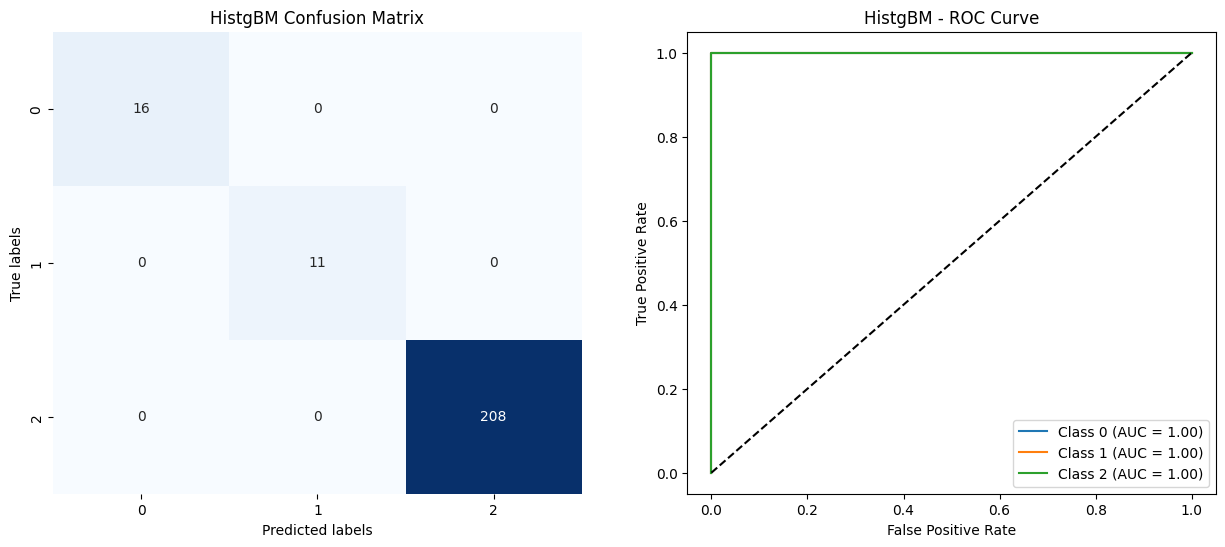

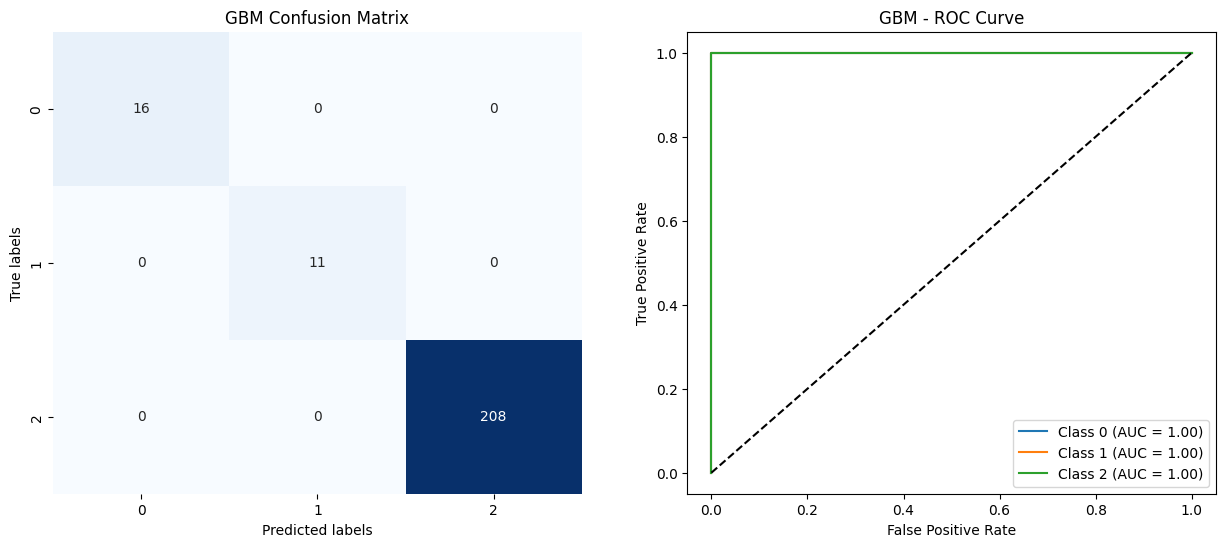

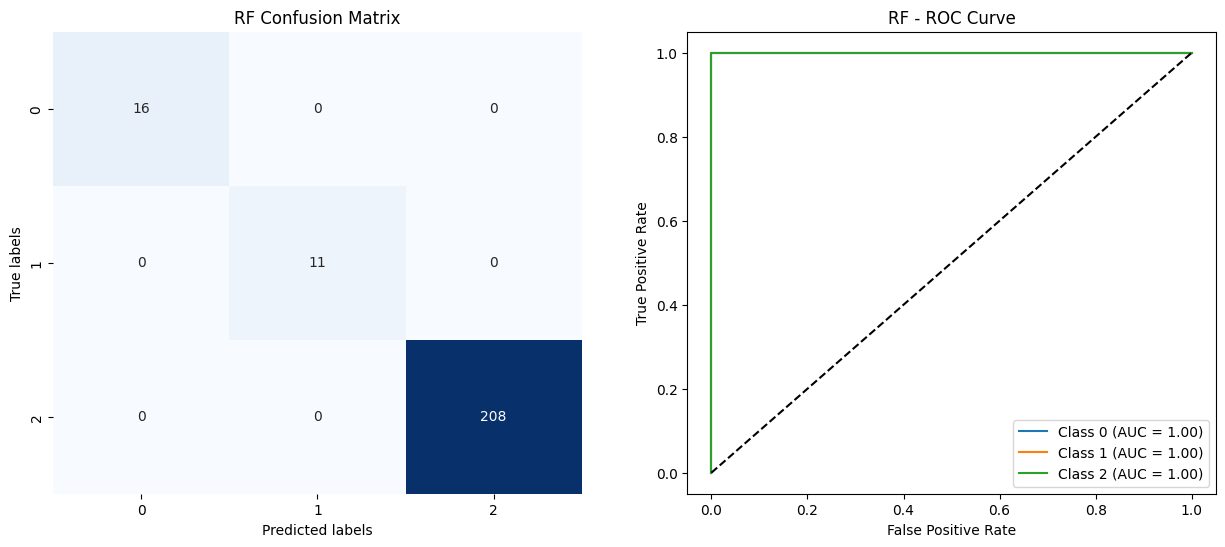

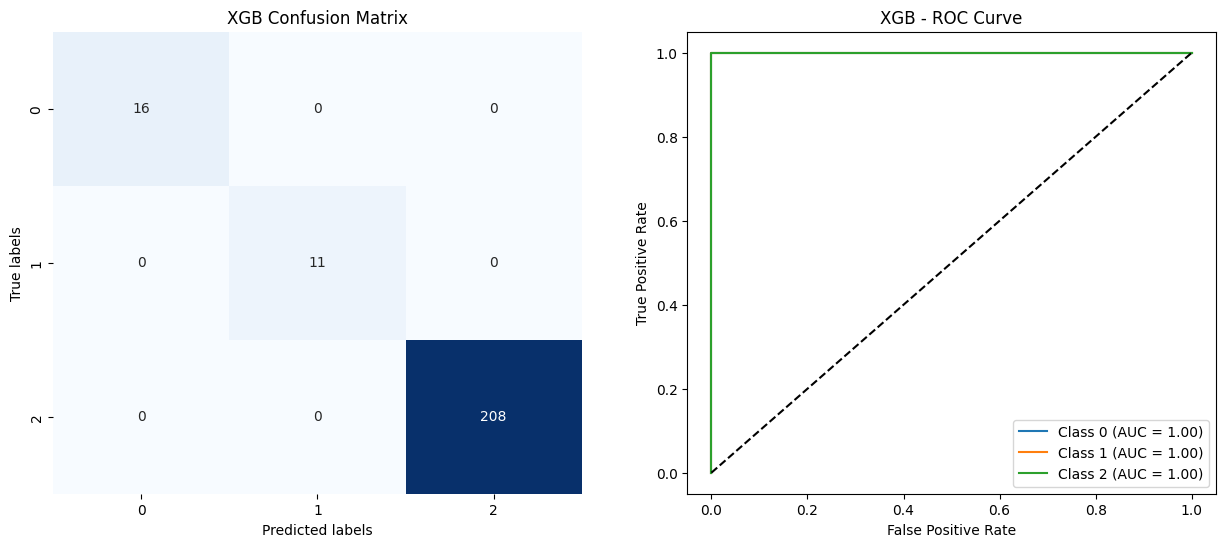

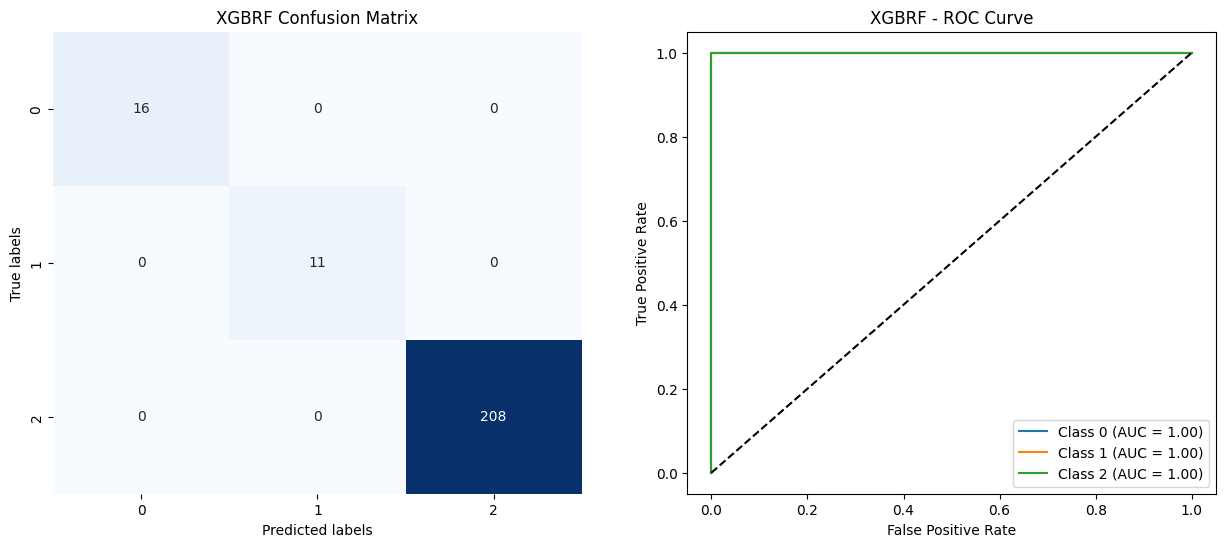

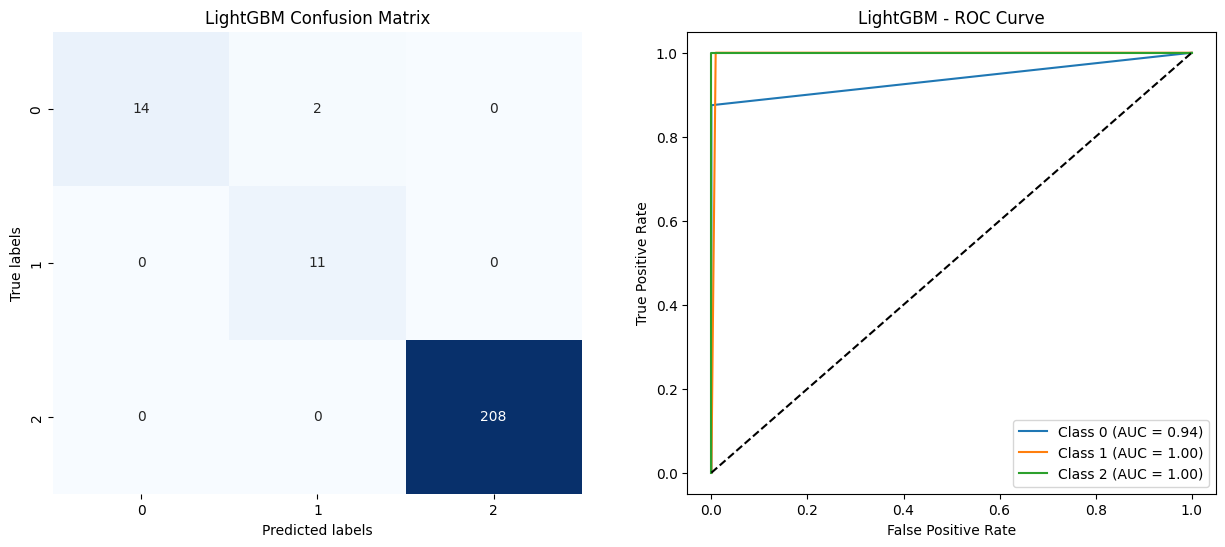

,Model,F1,MSE,Acc,Auc
0,LG,0.929090,0.080851,0.619610,0.770705
1,SDG,0.831161,0.319149,0.333333,0.500000
2,PA,0.831161,0.319149,0.333333,0.500000
3,KNN,0.828781,0.340426,0.330128,0.502304
4,CART,1.000000,0.000000,1.000000,1.000000
5,HistgBM,1.000000,0.000000,1.000000,1.000000
6,GBM,1.000000,0.000000,1.000000,1.000000
7,RF,1.000000,0.000000,1.000000,1.000000
8,XGB,1.000000,0.000000,1.000000,1.000000
9,XGBRF,1.000000,0.000000,1.000000,1.000000


In [176]:
classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,dx,"Sentiment")

Overfitting Control

In [177]:
def check_overfitting(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"🔹 Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    print(f"🔹 Train F1-score: {train_f1:.4f} | Test F1-score: {test_f1:.4f}")

    
    acc_diff = train_acc - test_acc
    f1_diff = train_f1 - test_f1

    if acc_diff > 0.10 or f1_diff > 0.10:  # %10'dan fazla fark varsa Overfitting riski var
        print("⚠️ Model overfitting yapıyor olabilir!")
    else:
        print("✅ Model iyi genelleme yapıyor.")

    return train_acc, test_acc, train_f1, test_f1


In [308]:
def plot_overfitting_graph(train_scores, test_scores, metric_name="Score"):
    epochs = range(1, len(train_scores) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_scores, 'bo-', label='Train ' + metric_name)
    plt.plot(epochs, test_scores, 'ro-', label='Test ' + metric_name)
    plt.xlabel('Epochs / Iterations')
    plt.ylabel(metric_name)
    plt.title(f'Training vs Testing {metric_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [181]:
train_acc, test_acc, train_f1, test_f1=check_overfitting(RandomForestClassifier(),x_tr,x_ts,y_tr,y_ts)

🔹 Train Accuracy: 1.0000 | Test Accuracy: 1.0000
🔹 Train F1-score: 1.0000 | Test F1-score: 1.0000
✅ Model iyi genelleme yapıyor.


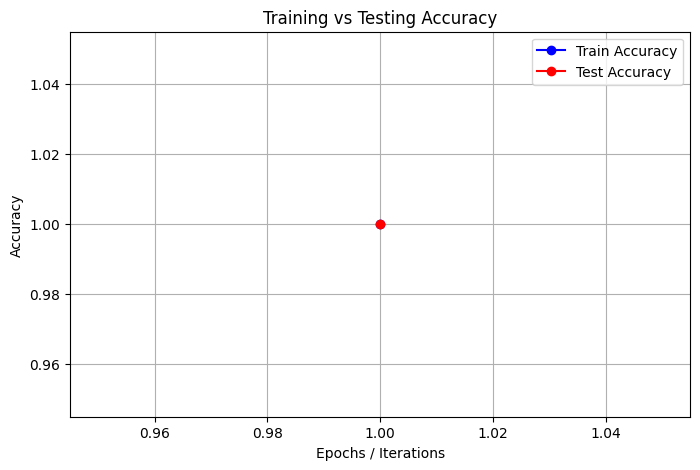

In [182]:
plot_overfitting_graph([train_acc],[test_acc],metric_name="Accuracy")

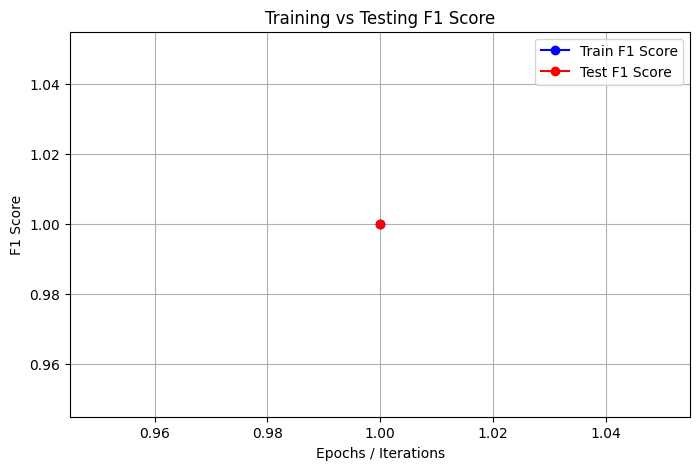

In [184]:
plot_overfitting_graph([train_f1],[test_f1],metric_name="F1 Score")

In [189]:
dx=data[["Brand","Price","Rating","Text","Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]]

In [190]:
dx.groupby(["Sentiment"])["Price"].mean().reset_index().sort_values(by="Price",ascending=False)

,Sentiment,Price
0,Negatif,35970.893016
2,Pozitif,33611.582609
1,Nötr,33344.706458


Filled No comment Data

In [292]:
for val in df[df["Text"]=="yorum yoktur"]["Rating"].values:
    if 3.9< val < 5.1:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="Pozitif"
    elif 2.9< val <3.9:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="Nötr"
    else:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="Negatif"

In [293]:
df

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,CASPER,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,8750.00,60500.0,4.2,daha çok yeni olduğu için performansına dair y...,I can not comment on the performance of more n...,0.014,0.691,0.295,0.9988,Pozitif
1,LENOVO,NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...,13499.00,18500.0,4.5,çok begendim ikincisini sipariş verecem tavsiy...,I would like to order the latter.I have resear...,0.003,0.740,0.257,0.9993,Pozitif
2,Zeiron,Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...,18299.00,30300.0,4.6,oğlum için aldım harika bir ürün tavsiye ederi...,I bought a great product for my son I recommen...,0.010,0.686,0.304,0.9996,Pozitif
3,LENOVO,IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....,11005.00,4354.0,3.8,sorunsuz geldi teşekkür ederim satıcıya karne ...,Thank you. I bought it as a report card gift t...,0.047,0.733,0.220,0.9959,Pozitif
4,ASUS,Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...,15498.00,7974.0,4.5,kızıma aldım çok memnun 12 yaşındaki ortaokula...,I bought my daughter very satisfied 12 -year -...,0.045,0.651,0.304,0.9992,Pozitif
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,LENOVO,"Ryzen 7 Pro 5850u 48gb 2tb Ssd 14"" W11p 20xls3...",43399.00,0.0,0.0,yorum yoktur,NO COMMENT,0.000,1.000,0.000,0.0000,Negatif
2789,HP,"24GB 4TB SSD RTX4070/8GB 144HZ 16.1"" FHD FDOS ...",75716.13,0.0,0.0,yorum yoktur,NO COMMENT,0.000,1.000,0.000,0.0000,Negatif
2790,HP,"64GB 256GB SSD 15.6"" FHD W11PRO 6S6Z1EA & PER4...",39655.09,0.0,0.0,yorum yoktur,NO COMMENT,0.000,1.000,0.000,0.0000,Negatif
2791,LENOVO,V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...,24464.30,0.0,5.0,yorum yoktur,NO COMMENT,0.000,1.000,0.000,0.0000,Pozitif


In [295]:
for col in df.select_dtypes(object).columns:
    df[col]=le.fit_transform(df[col])


In [296]:
df

,Brand,Model,Price,Favori Number,Rating,Text,Translated Text,Negatif,Notr,Positif,Compound,Sentiment
0,5,1757,8750.00,60500.0,4.2,127,243,0.014,0.691,0.295,0.9988,2
1,24,1712,13499.00,18500.0,4.5,645,412,0.003,0.740,0.257,0.9993,2
2,42,2500,18299.00,30300.0,4.6,475,187,0.010,0.686,0.304,0.9996,2
3,24,1346,11005.00,4354.0,3.8,548,633,0.047,0.733,0.220,0.9959,2
4,1,2354,15498.00,7974.0,4.5,413,227,0.045,0.651,0.304,0.9992,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,24,2003,43399.00,0.0,0.0,634,497,0.000,1.000,0.000,0.0000,0
2789,15,261,75716.13,0.0,0.0,634,497,0.000,1.000,0.000,0.0000,0
2790,15,520,39655.09,0.0,0.0,634,497,0.000,1.000,0.000,0.0000,0
2791,24,2255,24464.30,0.0,5.0,634,497,0.000,1.000,0.000,0.0000,2


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


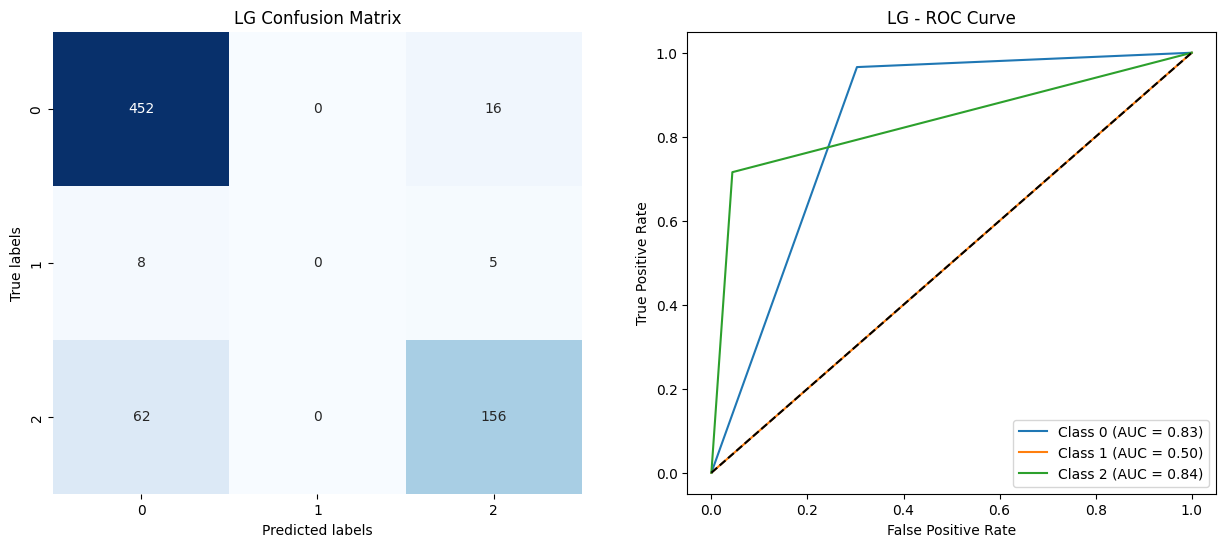

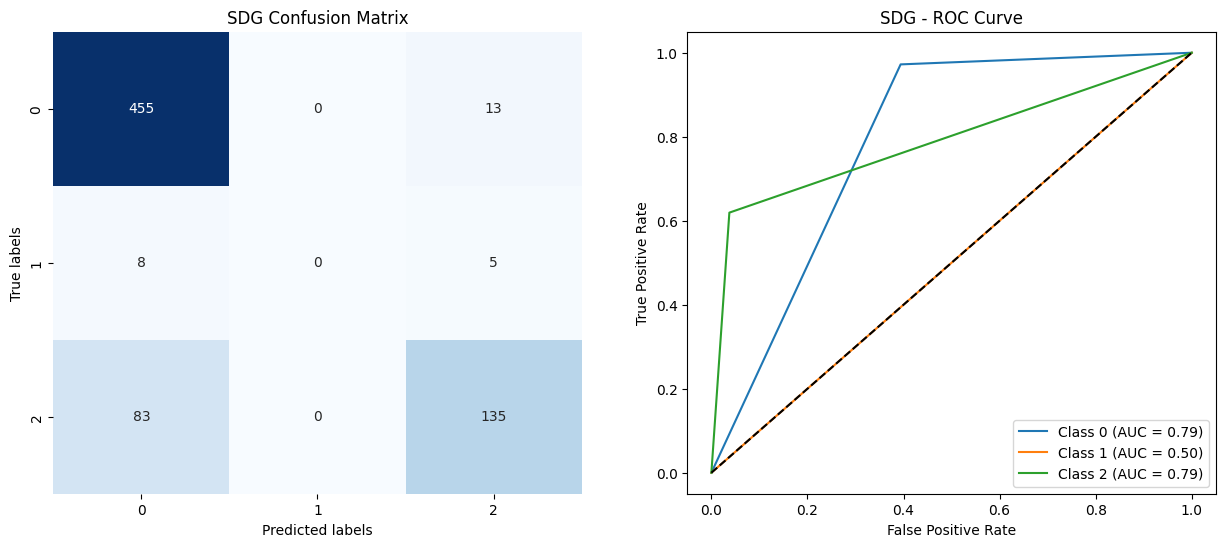

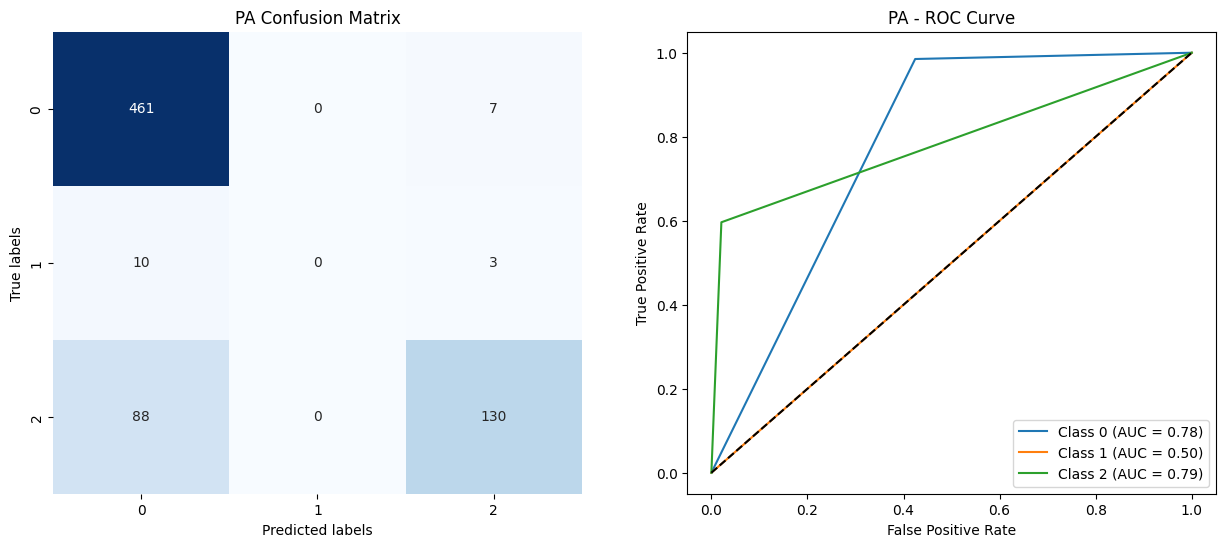

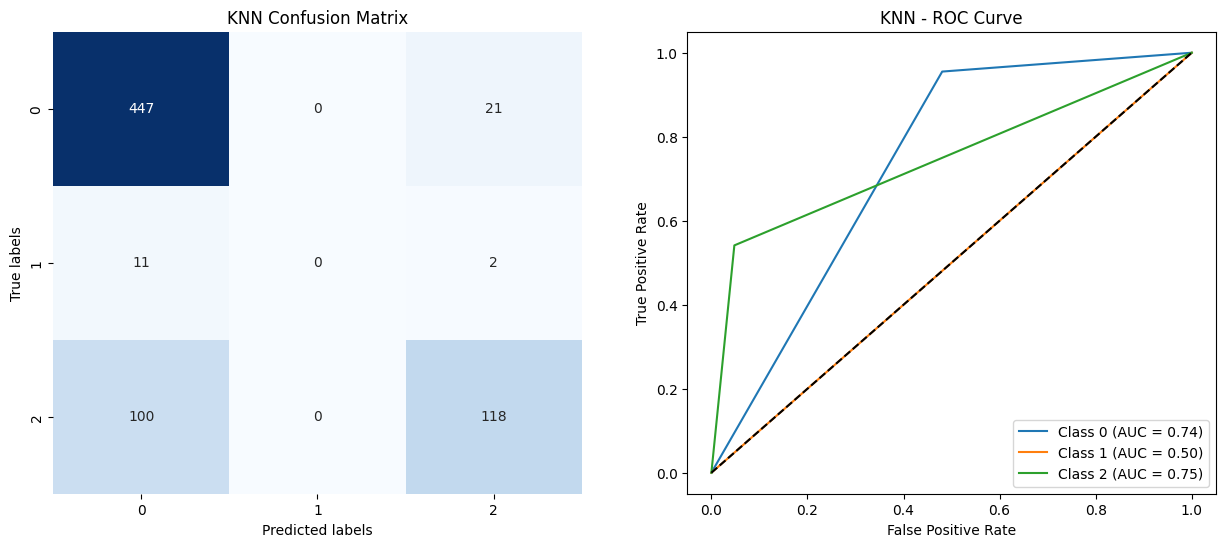

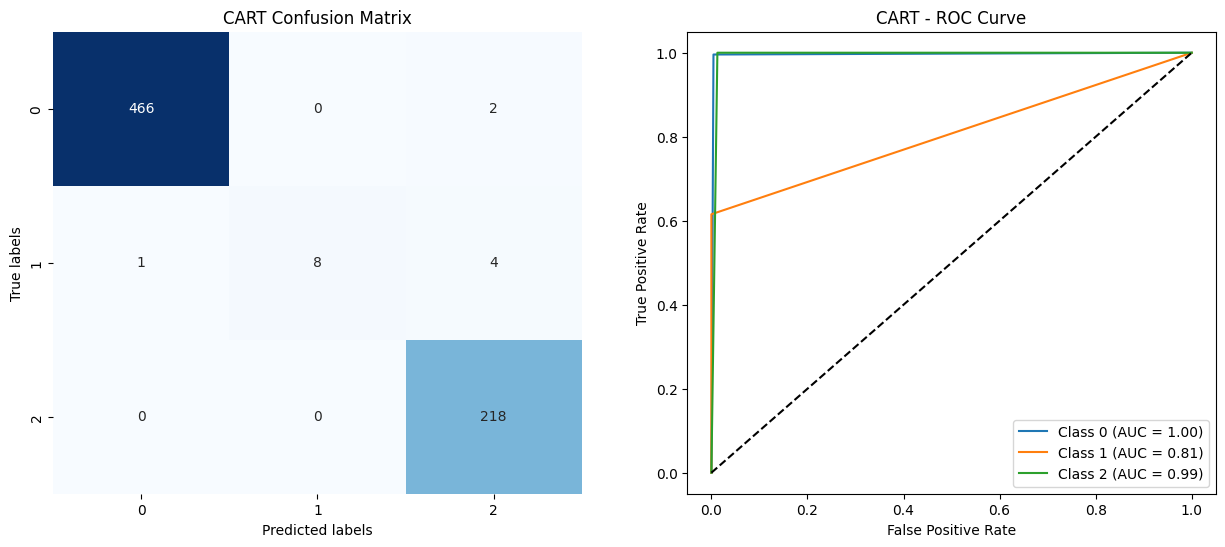

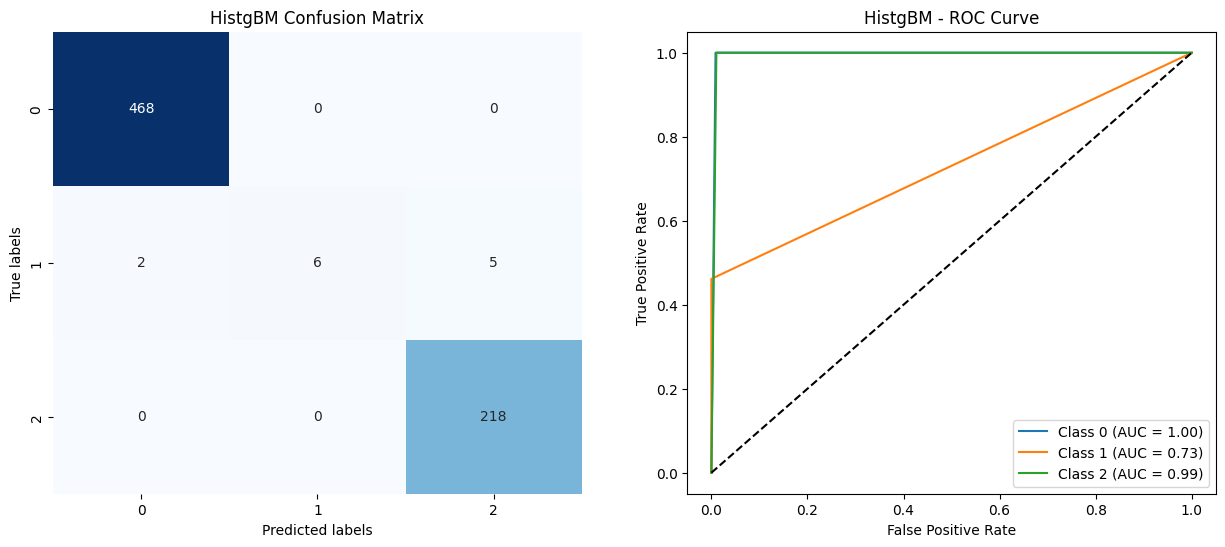

In [ ]:
classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,df,"Sentiment")

In [302]:
train_acc, test_acc, train_f1, test_f1=check_overfitting(DecisionTreeClassifier(),x_tr,x_ts,y_tr,y_ts)

🔹 Train Accuracy: 1.0000 | Test Accuracy: 0.9385
🔹 Train F1-score: 1.0000 | Test F1-score: 0.9381
✅ Model iyi genelleme yapıyor.


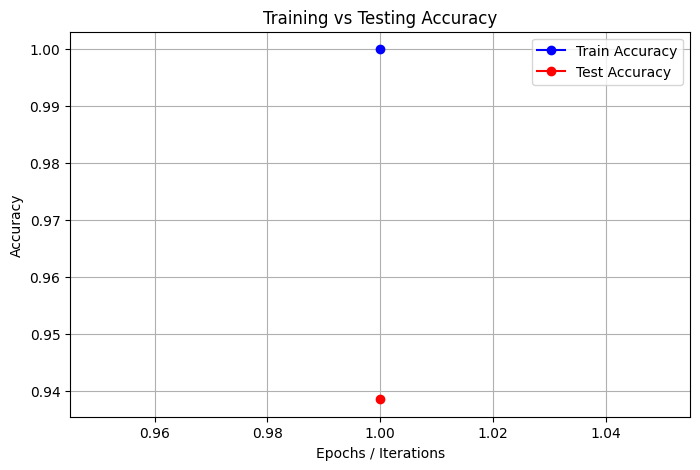

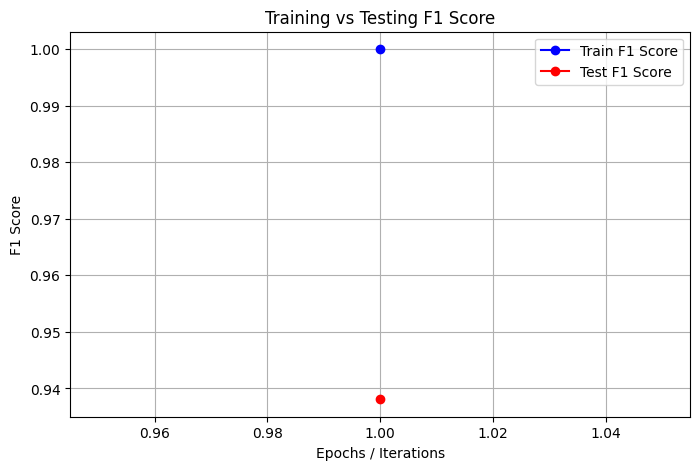

In [ ]:
plot_overfitting_graph([train_acc], [test_acc], metric_name="Accuracy")
plot_overfitting_graph([train_f1], [test_f1], metric_name="F1 Score")